# Travelling Salesman Problem 

1. Found the optimal path for 4 cities in 0.0 seconds.Path: [0, 2, 1, 3, 0] Distance: 125
2. Found the optimal path for 5 cities in 0.0 seconds.Path: [0, 3, 4, 1, 2, 0] Distance: 289
3. Found the optimal path for 6 cities in 0.0 seconds.Path: [0, 1, 4, 3, 5, 2, 0] Distance: 248
4. Found the optimal path for 7 cities in 0.006 seconds.Path: [0, 5, 1, 6, 2, 4, 3, 0] Distance: 211
5. Found the optimal path for 8 cities in 0.021 seconds.Path: [0, 6, 7, 3, 4, 2, 5, 1, 0] Distance: 264
6. Found the optimal path for 9 cities in 0.1707 seconds.Path: [0, 5, 3, 4, 2, 1, 6, 7, 8, 0] Distance: 302
7. Found the optimal path for 10 cities in 1.5947 seconds.Path: [0, 4, 2, 6, 5, 1, 7, 3, 8, 9, 0] Distance: 260
8. Found the optimal path for 11 cities in 18.7938 seconds.Path: [0, 7, 5, 3, 2, 9, 6, 4, 8, 10, 1, 0] Distance: 284


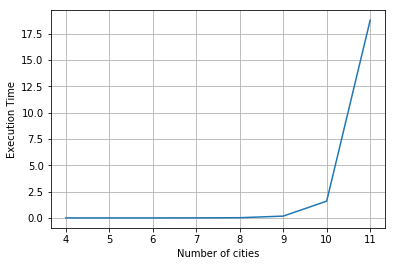

In [3]:
import numpy as np
from scipy.spatial.distance import squareform
from time import time
import sys
import matplotlib.pyplot as plt

def generator(no_of_cities):
    # This function takes the number of cities as the input and returns a matrix containng random distances between the cities
    final_list=[]
    n = no_of_cities

    for x in range(no_of_cities-1):
        arr = np.random.randint(low=10, high=100, size=n-1)
        n = (n-1)
        final_list.append(arr.tolist())

    raw = np.array(final_list)
    final = squareform(np.hstack(raw))
    return final


def permutations(elements):
    # This function takes number of cities as the input and returns the all the possible permutations
    if len(elements) <=1:
        yield elements
    else:
        for perm in permutations(elements[1:]):
            for i in range(len(elements)):
                yield perm[:i] + elements[0:1] + perm[i:]
                
               
def tsp_algorithm(cities, distances):
    # Input - Takes the number of cities and the distance matrix as the input
    # Output - Retturns the optimal path and the distance
    city_num_array = np.arange(1,cities)
    city_num_list = city_num_array.tolist()
    list_perm = list(permutations(city_num_list))
    for element in list_perm:
        element.insert(0, 0)
        element.append(0)
   
    minimum_distance = sys.maxsize
    optimal_path = []
    for path_index,path in enumerate(list_perm):
        path_length = len(path)
        previous = 0
        current = 0
        distance = 0
        for city_index, item in enumerate(path):
            if(city_index == 0):
                continue
            current = item
            distance+=distances[previous][current]
            previous = current
        if(distance < minimum_distance):
            minimum_distance = distance
            optimal_path = path
       
    return minimum_distance,optimal_path


n = 4
x_n = []
y_time = []
for x in range(8):
    start = time()
    distancesa = generator(n)
    dis,path = tsp_algorithm(n,distancesa)
    end = time()
    total_time = end - start
    print( "%s. Found the optimal path for %s cities in %s seconds.Path: %s Distance: %s" % ( x+1, round(n,4), round(total_time, 4), path, dis ) )
    x_n.append(n)
    y_time.append(round(total_time,4))
    n = n + 1
    
plt.plot(x_n,y_time)
plt.xlabel('Number of cities')
plt.ylabel('Execution Time')
plt.grid(True)
plt.show()



This repo contains an introduction to [Jupyter](https://jupyter.org) and [IPython](https://ipython.org).

Outline of some basics:

* [Notebook Basics](../examples/Notebook/Notebook%20Basics.ipynb)
* [IPython - beyond plain python](../examples/IPython%20Kernel/Beyond%20Plain%20Python.ipynb)
* [Markdown Cells](../examples/Notebook/Working%20With%20Markdown%20Cells.ipynb)
* [Rich Display System](../examples/IPython%20Kernel/Rich%20Output.ipynb)
* [Custom Display logic](../examples/IPython%20Kernel/Custom%20Display%20Logic.ipynb)
* [Running a Secure Public Notebook Server](../examples/Notebook/Running%20the%20Notebook%20Server.ipynb#Securing-the-notebook-server)
* [How Jupyter works](../examples/Notebook/Multiple%20Languages%2C%20Frontends.ipynb) to run code in different languages.

You can also get this tutorial and run it on your laptop:

    git clone https://github.com/ipython/ipython-in-depth

Install IPython and Jupyter:

with [conda](https://www.anaconda.com/download):

    conda install ipython jupyter

with pip:

    # first, always upgrade pip!
    pip install --upgrade pip
    pip install --upgrade ipython jupyter

Start the notebook in the tutorial directory:

    cd ipython-in-depth
    jupyter notebook